## Load and Inspect Data

Load the 'amazonreviews.tsv' dataset into a pandas DataFrame and perform an initial inspection to understand its structure, columns, and data types. This will help identify any immediate issues or formatting requirements.


In [14]:
import pandas as pd

# Load the 'amazonreviews.tsv' dataset into a pandas DataFrame with tab separator
df = pd.read_csv('/content/amazonreviews.tsv', sep='\t')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print('\nDataFrame Info:')
df.info()

# Check the dimensions of the DataFrame (number of rows and columns)
print('\nDataFrame Shape:')
print(df.shape)

First 5 rows of the DataFrame:
  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB

DataFrame Shape:
(10000, 2)


## Clean and Preprocess Text Data

Clean the review text by converting it to lowercase, removing punctuation, special characters, and numerical digits. Remove common English stopwords to prepare the text for analysis. Also, check for and handle any duplicate reviews or missing values.



To begin the text cleaning and preprocessing, I will import the necessary libraries, download NLTK stopwords, and define a function to clean the text data as specified in the instructions. This includes converting to lowercase, removing punctuation, special characters, and numbers, and removing stopwords.



In [15]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^"\w\s"]', '', text)

    # Remove special characters and numerical digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    text = ' '.join(words)

    return text

# Apply the clean_text function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

print("Review column after cleaning and creating 'cleaned_review' column:")
print(df[['review', 'cleaned_review']].head())

Review column after cleaning and creating 'cleaned_review' column:
                                              review  \
0  Stuning even for the non-gamer: This sound tra...   
1  The best soundtrack ever to anything.: I'm rea...   
2  Amazing!: This soundtrack is my favorite music...   
3  Excellent Soundtrack: I truly like this soundt...   
4  Remember, Pull Your Jaw Off The Floor After He...   

                                      cleaned_review  
0  stuning even nongamer sound track beautiful pa...  
1  best soundtrack ever anything im reading lot r...  
2  amazing soundtrack favorite music time hands i...  
3  excellent soundtrack truly like soundtrack enj...  
4  remember pull jaw floor hearing youve played g...  


In [16]:
print('\n--- Handling Duplicates and Missing Values ---')

# Check for duplicate rows based on the 'cleaned_review' column
initial_rows = df.shape[0]
duplicate_rows = df.duplicated(subset=['cleaned_review']).sum()
print(f'Number of duplicate reviews before removal: {duplicate_rows}')

# Remove duplicate rows based on 'cleaned_review', keeping the first occurrence
df.drop_duplicates(subset=['cleaned_review'], inplace=True)
print(f'Number of rows after removing duplicates: {df.shape[0]}')

# Check for any missing values in the 'cleaned_review' column
missing_values = df['cleaned_review'].isnull().sum()
print(f'Number of missing values in "cleaned_review" column: {missing_values}')

# If there were any missing values, fill them with an empty string (though unlikely after cleaning)
if missing_values > 0:
    df['cleaned_review'].fillna('', inplace=True)
    print('Missing values in "cleaned_review" filled with empty string.')

print('\nDataFrame Info after cleaning, duplicate removal, and missing value check:')
df.info()


--- Handling Duplicates and Missing Values ---
Number of duplicate reviews before removal: 1
Number of rows after removing duplicates: 9999
Number of missing values in "cleaned_review" column: 0

DataFrame Info after cleaning, duplicate removal, and missing value check:
<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           9999 non-null   object
 1   review          9999 non-null   object
 2   cleaned_review  9999 non-null   object
dtypes: object(3)
memory usage: 312.5+ KB


## Perform Exploratory Data Analysis (EDA)
Conduct exploratory analysis including visualizing the distribution of positive and negative sentiments. Generate word clouds for both positive and negative reviews to highlight frequently occurring terms. Additionally, identify and list the most common words in each sentiment category to gain insights into customer feedback.



The first step is to prepare the 'label' column for analysis by converting its categorical values ('pos', 'neg') into a numerical representation (1, 0). This allows for easier statistical analysis and visualization of sentiment distribution.



In [17]:
print('--- Converting Sentiment Labels ---')
# Convert 'label' column to numerical representation (pos: 1, neg: 0)
df['sentiment'] = df['label'].map({'pos': 1, 'neg': 0})

# Display the value counts of the new 'sentiment' column
print('\nValue counts of sentiment after conversion:')
print(df['sentiment'].value_counts())

--- Converting Sentiment Labels ---

Value counts of sentiment after conversion:
sentiment
0    5096
1    4903
Name: count, dtype: int64



--- Visualizing Sentiment Distribution ---


/tmp/ipython-input-331/1786749641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


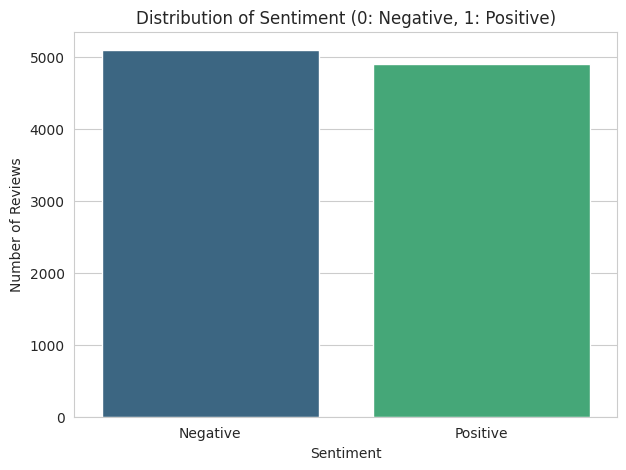

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\n--- Visualizing Sentiment Distribution ---')

# Visualize the distribution of sentiment
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()


To visualize frequently occurring terms, I will separate the cleaned reviews into positive and negative groups, then generate and display word clouds for each sentiment category as specified in the subtask.




--- Generating Word Clouds ---


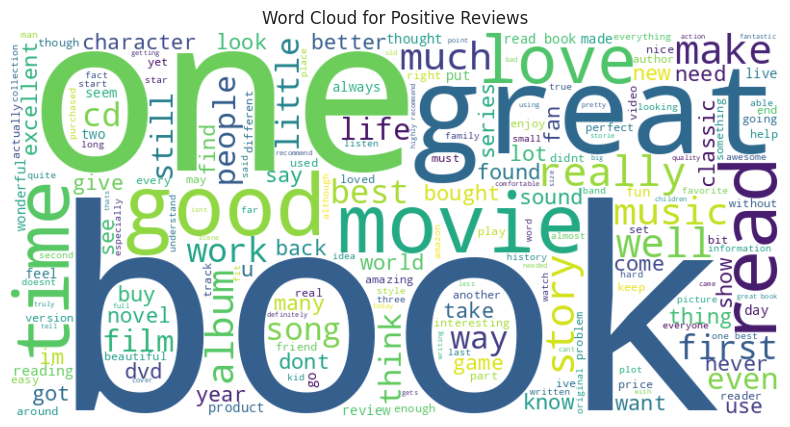

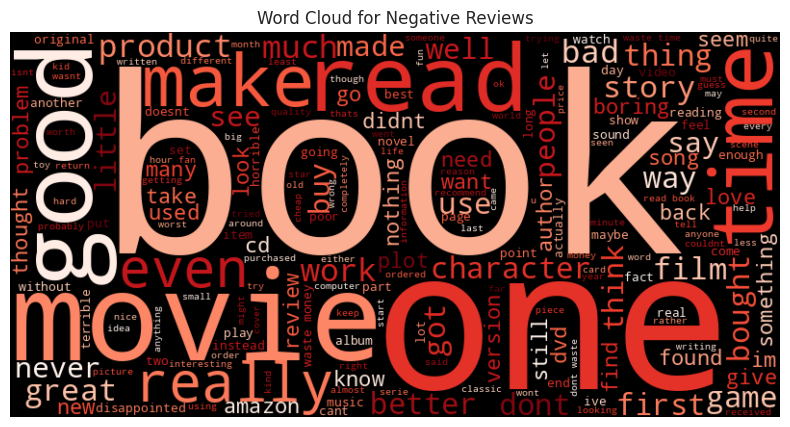

In [19]:
from wordcloud import WordCloud

print('\n--- Generating Word Clouds ---')

# Separate reviews into positive and negative sentiments
positive_reviews = df[df['sentiment'] == 1]['cleaned_review']
negative_reviews = df[df['sentiment'] == 0]['cleaned_review']

# Concatenate all positive and negative reviews into single strings
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate a word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the generated word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate a word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Display the generated word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [20]:
from collections import Counter

print('--- Most Common Words in Reviews ---')

# Tokenize and count words in positive reviews
pos_tokens = positive_text.split()
pos_word_counts = Counter(pos_tokens)
most_common_pos = pos_word_counts.most_common(20)

# Tokenize and count words in negative reviews
neg_tokens = negative_text.split()
neg_word_counts = Counter(neg_tokens)
most_common_neg = neg_word_counts.most_common(20)

print('\nTop 20 words in Positive Reviews:')
for word, count in most_common_pos:
    print(f'{word}: {count}')

print('\nTop 20 words in Negative Reviews:')
for word, count in most_common_neg:
    print(f'{word}: {count}')

--- Most Common Words in Reviews ---

Top 20 words in Positive Reviews:
book: 3313
great: 2087
one: 1835
good: 1635
read: 1553
like: 1268
movie: 1085
would: 943
love: 902
time: 871
well: 854
really: 827
best: 801
get: 793
story: 713
first: 708
much: 650
cd: 581
music: 559
also: 557

Top 20 words in Negative Reviews:
book: 3184
one: 2022
like: 1547
movie: 1465
would: 1438
dont: 1240
read: 1187
get: 1137
good: 1134
time: 1032
even: 898
buy: 814
really: 778
much: 769
bad: 749
money: 744
first: 736
could: 658
better: 656
great: 632


## Feature Engineering for NLP


Transform the cleaned text data into numerical features using TF-IDF vectorization.



I will import the TfidfVectorizer, initialize it with a limit on features to manage dimensionality, and then transform the cleaned text data into a numerical feature matrix while also extracting the target sentiment labels.



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with a maximum of 5000 features
tfidf = TfidfVectorizer(max_features=5000)

# Transform the 'cleaned_review' column into a TF-IDF feature matrix
X = tfidf.fit_transform(df['cleaned_review'])

# Extract the target labels from the 'sentiment' column
y = df['sentiment'].values

# Print the shape of the feature matrix X
print(f'Shape of TF-IDF feature matrix X: {X.shape}')
print(f'Shape of target vector y: {y.shape}')

Shape of TF-IDF feature matrix X: (9999, 5000)
Shape of target vector y: (9999,)


## Implement SVM Model

Train a Support Vector Machine (SVM) classifier on the TF-IDF features and evaluate its performance.


**Reasoning**:
I will import the SVC class, instantiate the model with probability=True to allow ROC AUC calculation, fit it on the existing training data, and then evaluate its performance on the test set.



In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 1 & 2. Instantiate the SVM model
# Setting kernel='linear' for efficiency with text data and probability=True for ROC AUC
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# 3. Fit the model to the training data
print('Training SVM model (this may take a few minutes)...')
svm_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# 5. Calculate predicted probabilities for ROC AUC
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# 6. Print evaluation metrics
print('\n--- SVM Model Performance ---')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Positive']))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_svm):.4f}')

Training SVM model (this may take a few minutes)...

--- SVM Model Performance ---
Accuracy Score: 0.8525

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      1019
    Positive       0.85      0.86      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

ROC AUC Score: 0.9310


## Implement Neural Network Model

Develop and train a Multi-Layer Perceptron (MLP) neural network to classify review sentiment using the TF-IDF features.



I will import the MLPClassifier, initialize it with the specified parameters, fit it to the training data, and then evaluate its performance on the test set by calculating accuracy, classification report, and ROC AUC.



In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 1 & 2. Instantiate the MLPClassifier
# Using (100,) hidden layer size, relu activation, and max_iter=300 for convergence
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42)

# 3. Fit the model to the training data
print('Training MLP model (this may take a few minutes)...')
mlp_model.fit(X_train, y_train)

# 4. Generate predictions and probabilities for the test set
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# 5. Print evaluation metrics
print('\n--- MLP Model Performance ---')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_mlp):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_mlp, target_names=['Negative', 'Positive']))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob_mlp):.4f}')

Training MLP model (this may take a few minutes)...

--- MLP Model Performance ---
Accuracy Score: 0.8170

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82      1019
    Positive       0.81      0.81      0.81       981

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

ROC AUC Score: 0.9021


## Compare Model Performance


Evaluate and compare the performance of Logistic Regression, SVM, and MLP models using a summary table and visualization.



I will consolidate the evaluation metrics for the Logistic Regression, SVM, and MLP models into a single pandas DataFrame and then create a grouped bar chart to visualize and compare their performance.



--- Model Performance Comparison Table ---
                 Model  Accuracy  F1-Score (Positive)   ROC AUC
0  Logistic Regression    0.8555             0.852174  0.933937
1                  SVM    0.8525             0.850633  0.931003
2                  MLP    0.8170             0.813456  0.902072


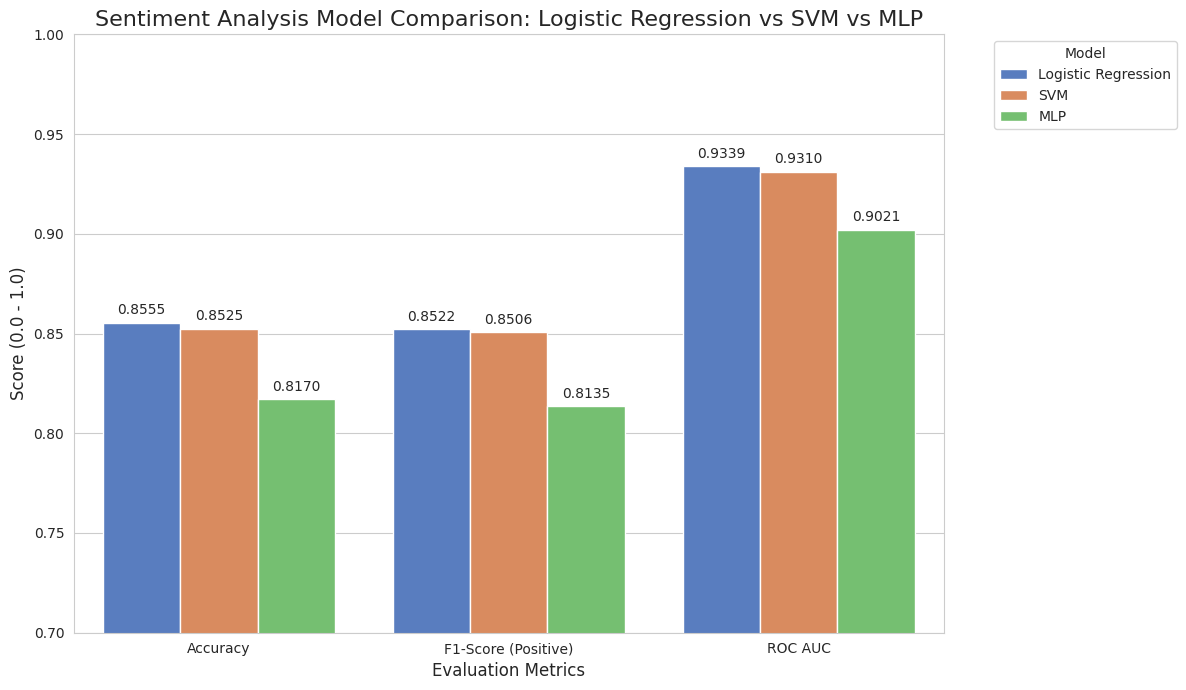

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# 1. Consolidate evaluation metrics
# F1-scores for the positive class (label 1)
f1_log_reg = f1_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred_svm)
f1_mlp = f1_score(y_test, y_pred_mlp)

# SVM Accuracy and ROC AUC from previous outputs (or recalculated if variables exist)
acc_svm = accuracy_score(y_test, y_pred_svm)
roc_svm = roc_auc_score(y_test, y_prob_svm)

# MLP Accuracy and ROC AUC
acc_mlp = accuracy_score(y_test, y_pred_mlp)
roc_mlp = roc_auc_score(y_test, y_prob_mlp)

# 2. Create a comparison DataFrame
comparison_data = {
    'Model': ['Logistic Regression', 'SVM', 'MLP'],
    'Accuracy': [accuracy, acc_svm, acc_mlp],
    'F1-Score (Positive)': [f1_log_reg, f1_svm, f1_mlp],
    'ROC AUC': [roc_auc, roc_svm, roc_mlp]
}

comparison_df = pd.DataFrame(comparison_data)

print('--- Model Performance Comparison Table ---')
print(comparison_df)

# 3. Create a grouped bar chart
# Melt the DataFrame for easier plotting with seaborn
df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')
barplot = sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette='muted')

# Add labels and title
plt.title('Sentiment Analysis Model Comparison: Logistic Regression vs SVM vs MLP', fontsize=16)
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.xlabel('Evaluation Metrics', fontsize=12)
plt.ylim(0.7, 1.0) # Zoom in to see differences clearly
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points', fontsize=10)

plt.tight_layout()
plt.show()

## Final Task

Summarize the findings, highlighting which model performed best and discussing the trade-offs between simplicity and complexity for this business problem.


## Summary:

### Q&A

**Which model performed best for this sentiment classification task?**
Based on the comparative analysis, **Logistic Regression** emerged as the top-performing model. It achieved the highest scores across all primary metrics: an accuracy of 0.8555, an F1-score of 0.8522, and an ROC AUC of 0.9339.

**What are the trade-offs between simplicity and complexity for this business problem?**
In this specific use case using TF-IDF features, simpler linear models (Logistic Regression and SVM) outperformed the more complex Multi-Layer Perceptron (MLP). While the MLP is theoretically more powerful at capturing non-linear relationships, its higher computational cost and complexity did not yield better results. Logistic Regression provided the best balance, offering superior predictive power with significantly lower training overhead and high interpretability.

---

### Data Analysis Key Findings

*   **Logistic Regression (Baseline):** Remained the strongest performer with an accuracy of **0.8555** and an ROC AUC of **0.9339**.
*   **Support Vector Machine (SVM):** Demonstrated highly competitive performance with an accuracy of **0.8525** and an ROC AUC of **0.9310**, trailing the baseline by a very slim margin.
*   **Multi-Layer Perceptron (MLP):** The most complex model yielded the lowest performance in this configuration, with an accuracy of **0.8170** and an ROC AUC of **0.9021**.
*   **Discriminative Power:** All three models maintained an ROC AUC above **0.90**, indicating that even the lowest-performing model (MLP) is highly capable of distinguishing between positive and negative sentiments.
*   **Feature Effectiveness:** The TF-IDF vectorization proved to be a highly effective feature extraction method for linear classifiers in this dataset.

---

### Insights or Next Steps

*   **Prioritize Linear Models:** For text classification tasks using TF-IDF, start with Logistic Regression as it is highly efficient and difficult to beat without significant hyperparameter tuning or more advanced architectures.
*   **Explore Deep Learning for Nuance:** Since the MLP underperformed relative to linear models, the next step should involve testing Word Embeddings (like Word2Vec or GloVe) or Transformer-based models (like BERT) to see if capturing semantic context provides the performance boost that the standard MLP lacked.
